In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import glob
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle


## Load Data

In [3]:
input_dir = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/'
test_data_dir = 'test_data'
train_data_dir = 'train_data'
with zipfile.ZipFile(os.path.join(input_dir, 'test.zip')) as zf:
    zf.extractall(test_data_dir)
    
with zipfile.ZipFile(os.path.join(input_dir, 'train.zip')) as zf:
    zf.extractall(train_data_dir)


In [58]:
# after unzip
test_data_dir = 'test_data/test/'
train_data_dir = 'train_data/train/'
train_list = glob.glob(os.path.join(train_data_dir,'*.jpg'))
test_list = glob.glob(os.path.join(test_data_dir, '*.jpg'))
print(f"Train Data: {len(train_list)}")
print(f"Test Data: {len(test_list)}")

Train Data: 25000
Test Data: 12500


In [4]:
# train_dogs = [file for file in train_list if 'dog' in file]
# len(train_dogs)

12500

In [59]:
train_list[:10]

['train_data/train/dog.5051.jpg',
 'train_data/train/dog.10824.jpg',
 'train_data/train/dog.6954.jpg',
 'train_data/train/cat.6403.jpg',
 'train_data/train/cat.2470.jpg',
 'train_data/train/dog.1271.jpg',
 'train_data/train/dog.5843.jpg',
 'train_data/train/cat.3299.jpg',
 'train_data/train/dog.9426.jpg',
 'train_data/train/dog.3632.jpg']

In [60]:
# Labels 1:'dog', 0:'cat'
train_image_labels = [1 if 'dog' in train_list[i] else 0 for i in range(len(train_list))]

In [61]:
# test_dogs = [file for file in test_list if 'dog' in file]
# test_cats = [file for file in test_list if 'cat' in file]
# Labels 1:'dog', 0:'cat'
test_image_labels = [1 if 'dog' in test_list[i] else 0 for i in range(len(test_list))]

In [62]:
#ここでtrainとtestを一部(それぞれ5000件、50件)のみ使うように実装変更
# x = [1, 2, 3, 4, 5]
# y = [11, 12, 13, 14, 15]

# x_shuffled, y_shuffled = shuffle(x, y)
# print(f"x_shuffled:{x_shuffled}")
# print(f"y_shuffled:{y_shuffled}")

train_data, train_label = shuffle(train_list, train_image_labels)
test_data, test_label = shuffle(test_list, test_image_labels)

In [39]:
train_data[:10]

['train_data/train/dog.844.jpg',
 'train_data/train/dog.7706.jpg',
 'train_data/train/dog.11845.jpg',
 'train_data/train/cat.1386.jpg',
 'train_data/train/dog.6073.jpg',
 'train_data/train/dog.9575.jpg',
 'train_data/train/dog.5189.jpg',
 'train_data/train/cat.3163.jpg',
 'train_data/train/cat.6412.jpg',
 'train_data/train/dog.694.jpg']

In [19]:
# train_image_list = []
count = 5000
ROWS = 64
COLS = 64
CHANNELS = 3
train_image_list = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
# for filename in train_list:
# for filename in train_data[:5000]:
for i, filename in enumerate(train_data[:count]):
    img = cv2.imread(filename)
    with open(filename, 'rb') as f:
        binary = f.read()
    #arr = np.asarray(bytearray(binary), dtype=np.uint8)
    arr = np.asarray(bytearray(binary)).astype(np.uint8)
    img = cv2.imdecode(arr, -1)
    img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    #train_image_list.append(img)
    train_image_list[i] = img.T
#train_image_list

In [20]:
train_image_list[0].shape
#(500, 396, 3)
train_image_list[0]
train_image_list.shape

(5000, 3, 64, 64)

In [21]:
# train_image_labels = np.array(train_image_labels, dtype=object)
# train_image_labels = np.array(train_label[:5000], dtype=object)
train_image_labels = np.asarray(train_label[:5000]).astype(np.float32)

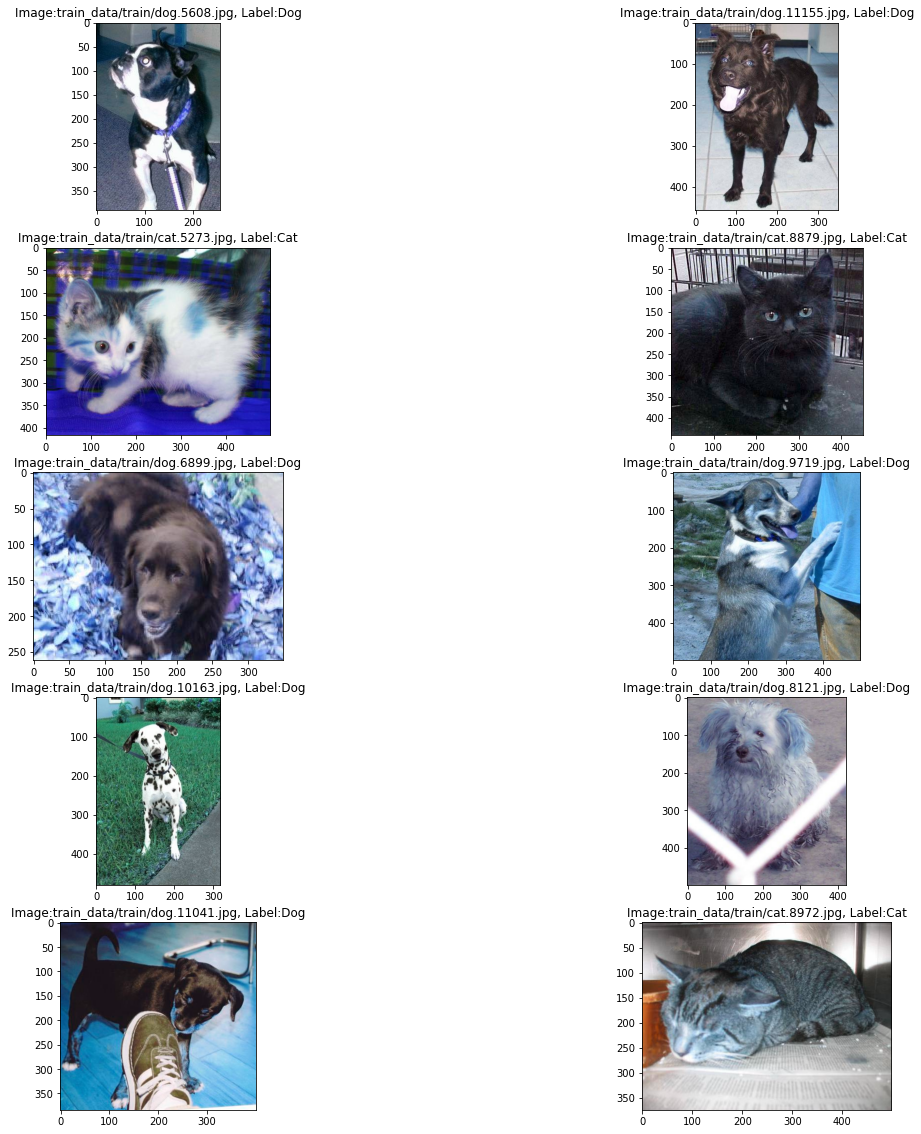

In [51]:
# fig = plt.figure(figsize=(20, 20))
# for i in range(10):
#     ax = fig.add_subplot(5, 2, i+1)
#     #label = 'Dog' if train_list[i] in train_dogs else 'Cat'
#     label = 'Dog' if train_image_labels[i]==1 else 'Cat'
#     ax.set_title(f'Image:{train_list[i]}, Label:{label}')
#     plt.imshow(train_image_list[i], cmap=None)
#     fig.show()

In [22]:
# test_image_list = []
count = 50
test_image_list = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
# for filename in test_list:
# for filename in test_data[:50]:
for i, filename in enumerate(test_data[:count]):
    img = cv2.imread(filename)
    with open(filename, 'rb') as f:
        binary = f.read()
    arr = np.asarray(bytearray(binary), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    test_image_list[i] = img.T
    #test_image_list.append(img)

In [63]:
def preprocess(image):
    count = len(image)
    image_list = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    for i, filename in enumerate(image):
        img = cv2.imread(filename)
        with open(filename, 'rb') as f:
            binary = f.read()
        arr = np.asarray(bytearray(binary), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
        image_list[i] = img.T
    image_list = image_list/255.0
    return image_list

In [17]:
#ここの変換のところで”setting an array element with a sequence.”エラー発生したので実装変更必要
# test_image_list = np.array(test_image_list, dtype=object)
#test_image_list = np.array(test_image_list).astype(np.float32)

In [23]:
# test_image_labels = np.array(test_label[:50], dtype=object)
test_image_labels = np.asarray(test_label[:50]).astype(np.float32)

In [24]:
train_image_list = train_image_list/255.0
test_image_list = test_image_list/255.0

In [25]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Convolution2D, MaxPooling2D, Dense, Activation, Flatten
#from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [28]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    model = Sequential()
    
    #model.add(Convolution2D(32, (3, 3), border_mode='same', input_shape=(3, 475, 428), activation='relu'))
    model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(3, ROWS, COLS), activation='relu'))
    model.add(Convolution2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first', pool_size=(2, 2)))
    
    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first', pool_size=(2, 2)))
    
    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first', pool_size=(2, 2)))
    
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first', pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = catdog()

In [29]:
epochs = 10
batch_size = 16

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

def run_cat_dog():
    
    history = LossHistory()
    model.fit(train_image_list, train_image_labels, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
    
    predictions_list = model.predict(test_image_list, verbose=0)
    return predictions_list, history

predictions_list, history = run_cat_dog()

Epoch 00007: early stopping


## Plot Loss

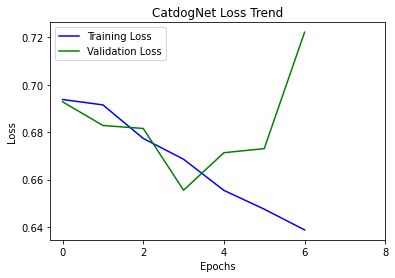

In [30]:
loss = history.losses
val_losses = history.val_losses

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CatdogNet Loss Trend")
plt.plot(loss, "blue", label="Training Loss")
plt.plot(val_losses, "green", label="Validation Loss")
plt.xticks(range(0, epochs)[0::2]) #2ごとに表示
plt.legend()
plt.show()

## Configure Inference Result

Dog:69.06%


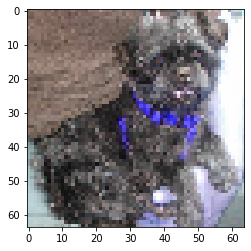

Dog:80.01%


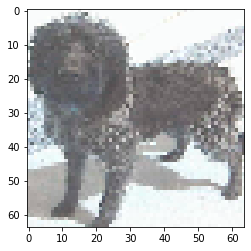

Dog:70.48%


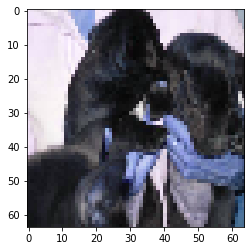

Cat:65.16%


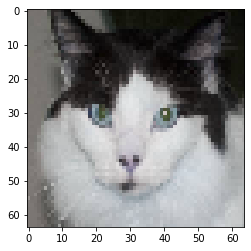

Dog:69.27%


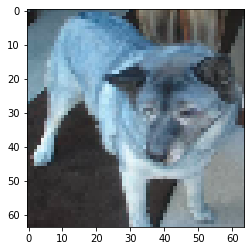

Cat:61.21%


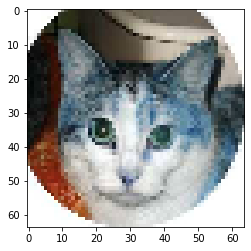

Dog:69.05%


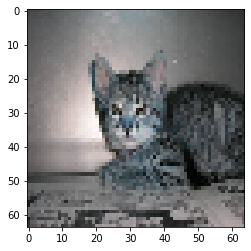

Cat:52.65%


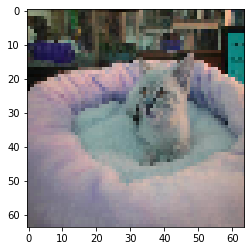

Dog:76.35%


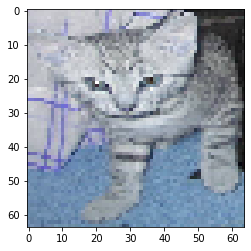

Dog:80.63%


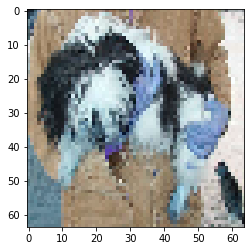

Dog:82.86%


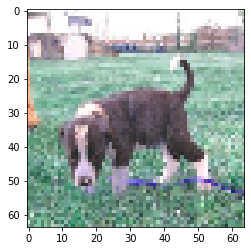

Cat:84.05%


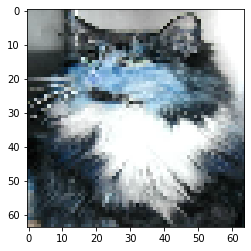

Dog:83.16%


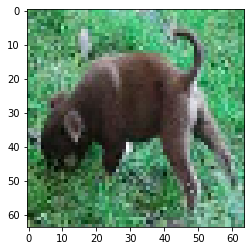

Dog:75.61%


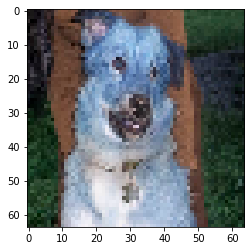

Dog:59.50%


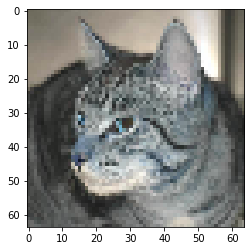

Dog:67.90%


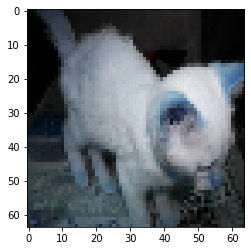

Dog:84.20%


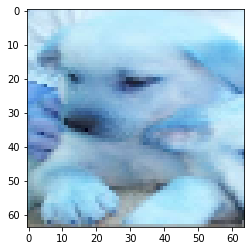

Dog:59.79%


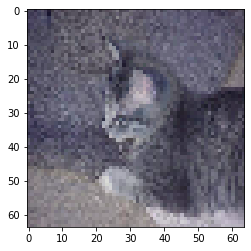

Dog:67.66%


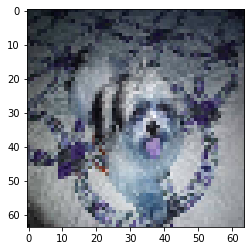

Dog:80.99%


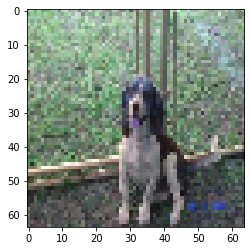

In [37]:
for i in range(0,20):
    if predictions_list[i,0] >= 0.5:
        print(f"Dog:{predictions_list[i][0]*100:.2f}%")
    else:
        print(f"Cat:{(1-predictions_list[i][0])*100:.2f}%")
        
    plt.imshow(test_image_list[i].T)
    plt.show()

## Output Result

In [72]:
#out_df = pd.DataFrame(columns=["id", "label"])
result_dict = []
for i,file in enumerate(test_data): #本当はこっち
#for i,file in enumerate(test_data[:10]): #テスト用
    filename = os.path.basename(file)
    #print(f"filename:{filename}") #filename:8518.jpg
    file_id = os.path.splitext(os.path.basename(file))[0] 
    #print(f"file_id:{file_id}") #file_id:8518
    #out_df.loc[i, "id"] = file_id
    
    #preprocess
    guess_data = preprocess([file])
    
    #inference
    predictions = model.predict(guess_data, verbose=0)
    prob = predictions[0][0]
    #print(f"predictions[0][0]:{predictions[0][0]}")  #predictions[0][0]:0.37587544322013855
    #print(f"Probability:{prob}")
    
    #out_df.loc[i, "label"] = prob
    
    result_dict.append({'id': file_id, 'label': prob})

out_df = pd.DataFrame(result_dict)    
out_df.to_csv('submission.csv', index=False)
print(out_df)

          id     label
0       4517  0.375875
1       2954  0.755365
2       6364  0.803905
3       3955  0.791740
4       6768  0.685271
...      ...       ...
12495    514  0.639733
12496  11050  0.787814
12497    611  0.748467
12498  11136  0.634223
12499   7620  0.799582

[12500 rows x 2 columns]


In [ ]:
#[ToDo]validation lossが大幅に上がっていることもあり、過学習への対策が必要
#https://deep-learning-study.net/overfitting/